# Observation of diffraction effect 

The physical model used to describe this effect :

\begin{equation}
    \frac{\partial E}{\partial z} = \frac{i}{2k}\nabla^2_{\bot}E
\end{equation}

We use spectral method to solve this equation numerically, so in order to verify the numerical solution, we compare the solution with analytic solution :



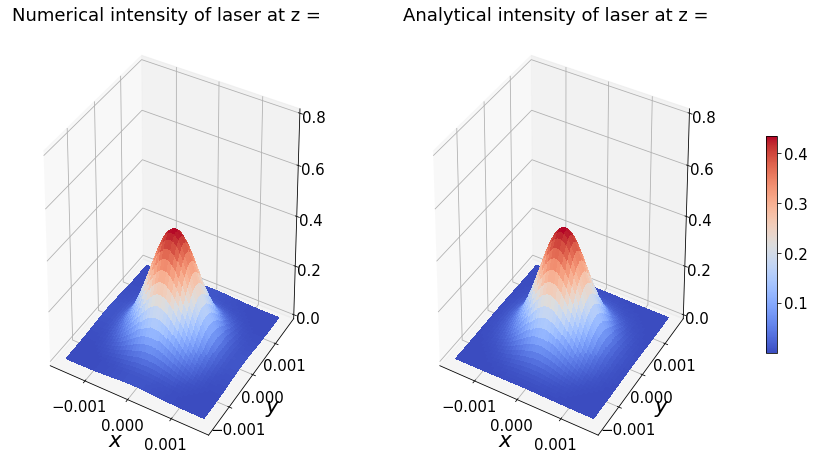

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

#Zoom the figure in matplotlib
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.labelsize'] = 'x-large'
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['lines.markersize'] = 10.0

#Parameter for initialize laser
w0 = 0.7*1e-3
Pcr = 1.7*1e9
p = 4
Pin = p*Pcr
lamb = 790*1e-9
k = 2*np.pi/lamb

#spacial discretization along x and y, need to be the same as production codes
L = 16*1e-4
N = 64
Lz = 2.0
Nz = 1000
saved_Nz = 101
r, d = np.linspace(-L, L, 2*N, retstep=True) 
x, y = np.meshgrid(r,r)

#Analytic solution
E0 = (2*Pin/(np.pi*w0**2))**(1/2)*1e-8
w = lambda z : w0*(1 + (2*z/(k*w0**2))**2)**(1/2)
square = np.vectorize(lambda x,y : x**2+y**2 )
xy2 = square(x,y)
inten_analy = lambda z : (E0*w0/w(z)*np.exp(-xy2/w(z)**2))**2

#Numerical solution
inten_num = np.loadtxt("../results/intensity_linear.txt")
inten_num = inten_num.reshape((saved_Nz, 2*N, 2*N)) #The shape is needed to be verified in production code

#Plot 3D comparison between numerical and analytical solution at arbitary z
axes = []
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(121,projection='3d')
ax.title.set_text('Numerical intensity of laser at z = ')
ax.set_zlim(0, 0.8)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
axes.append(ax)
surf = ax.plot_surface(x,y,inten_num[-1],cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax = fig.add_subplot(122,projection='3d')
ax.title.set_text('Analytical intensity of laser at z = ')
ax.set_zlim(0, 0.8)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
axes.append(ax)
surf = ax.plot_surface(x,y,inten_analy(52*Lz/53),cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, ax=axes,shrink=0.5, aspect=20)

plt.show()

# save figure as pdf
#plt.savefig("../figures/observables.pdf")

## Propagation 

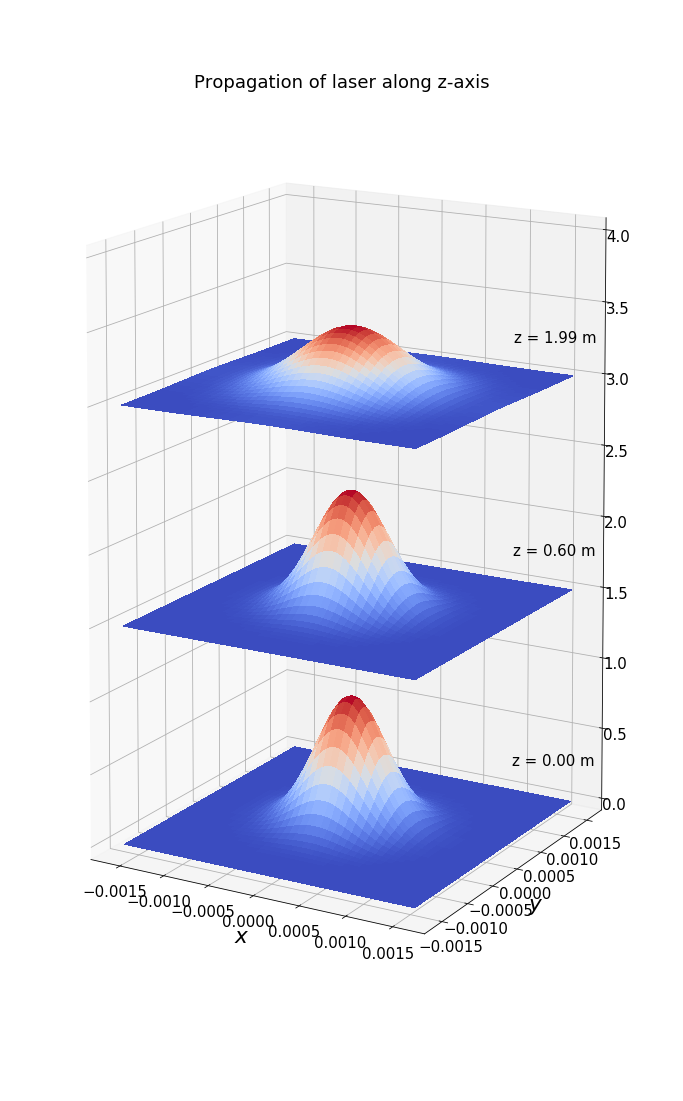

In [94]:
z_interested = np.array([0, 0.6, Lz-1/saved_Nz])
pos_interested = z_interested*saved_Nz/Lz
pos_interested = pos_interested.astype(int)

fig = plt.figure(figsize=(12, 20))
axes = []
ax = fig.add_subplot(111,projection='3d')
ax.set_title('Propagation of laser along z-axis')

for i in range(len(z_interested)):
    surf = ax.plot_surface(x,y,inten_num[pos_interested[i]]+1.5*i,cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax.text(0.001, 0.0015,1.5*i+0.2 ,"z = %.2f m "%z_interested[i], None)
    axes.append(ax)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlim(0, 4 )
ax.view_init(10, -60)
plt.show()


## Observe the conservation of energy of the laser and the variation of intensity along z-axis

C:\Users\Hong\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


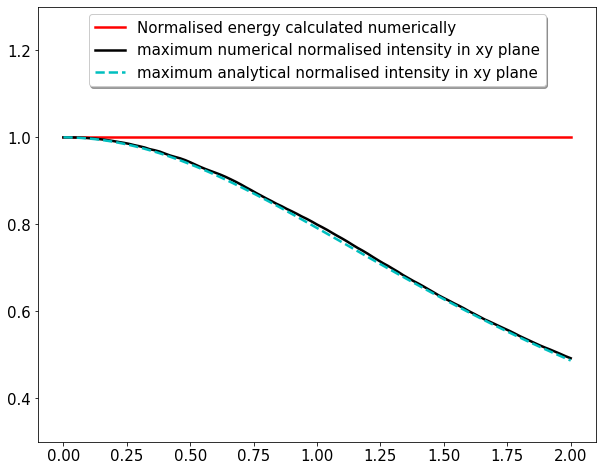

In [14]:
z = np.linspace(0, Lz, Nz/10 + 1)

Energ = []
Inten_max = []
for inten in inten_num:
    Energ.append(np.sum(inten))
    Inten_max.append(np.max(inten))
Energ = np.asarray(Energ)
Inten_max = np.asarray(Inten_max)

pos = z*51/Lz
pos = pos.astype(int)

plt.plot(z, Energ/Energ[0], 'r', label='Normalised energy calculated numerically')
plt.plot(z, Inten_max/Inten_max[0], 'k', label='maximum numerical normalised intensity in xy plane')
#the intensity is maximum at x=y=0
plt.plot(z, (w0/w(z))**2, 'c--', label='maximum analytical normalised intensity in xy plane')

plt.legend(loc='upper center', shadow=True, fontsize='medium')
plt.ylim(0.3,1.3)

plt.show()
#plt.savefig("../figures/observables.pdf")
